<a href="https://colab.research.google.com/github/kikirikikrikri/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/EnriqueColladoLS_DS5_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
# df = pd.merge(income, lifespan)
# df = pd.merge(df, population)
 df = income.merge(lifespan).merge(population)
  
 

In [19]:
df.shape

(40437, 5)

In [20]:
df.head

<bound method NDFrame.head of        geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0      afg  1800                                                603       
1      afg  1801                                                603       
2      afg  1802                                                603       
3      afg  1803                                                603       
4      afg  1804                                                603       
5      afg  1805                                                603       
6      afg  1806                                                603       
7      afg  1807                                                603       
8      afg  1808                                                603       
9      afg  1809                                                603       
10     afg  1810                                                604       
11     afg  1811                                                604   

In [21]:
# 'country' 'name' 'world_6region'
# entities = entities.drop('alt_5', 'alternative_1', 'alternative_2', 'alternative_3',
#        'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6',
#        'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid',
#        'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3',
#        'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude',
#        'main_religion_2008', 'pandg', 'un_state',
#        'unicode_region_subtag', 'upper_case_name', 'world_4region',
#        )
entities_name_region = entities[['country', 'name', 'world_6region']]

entities_name_region.head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [22]:
df = pd.merge(df, entities_name_region, left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [23]:
df = df.drop(columns =['geo', 'country'], axis = 'columns')
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [28]:
df = df.rename(columns ={
              'time': 'year'
    , 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income'
    , 'life_expectancy_years': 'lifespan'
    , 'population_total': 'population'
    , 'world_6region': 'region'
})
df.tail()

,year,income,lifespan,population,name,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


In [31]:
df['region'] = df['region'].replace('_',' ', regex=True).str.title()
df.head()

,year,income,lifespan,population,name,region
0,1800,603,28.21,3280000,Afghanistan,South Asia
1,1801,603,28.20,3280000,Afghanistan,South Asia
2,1802,603,28.19,3280000,Afghanistan,South Asia
3,1803,603,28.18,3280000,Afghanistan,South Asia
4,1804,603,28.17,3280000,Afghanistan,South Asia


## Explore data

In [33]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [34]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [35]:
df[df['year'] == 1800].skew()

year           0.000000
income         2.709177
lifespan       0.090251
population    10.199690
dtype: float64

In [36]:
df.describe(exclude = 'number')

,name,region
count,40437,40437
unique,187,6
top,Cameroon,Europe Central Asia
freq,219,10778


## Plot visualization

In [37]:
present = df[df['year'] == 2018]
present.head()

,year,income,lifespan,population,name,region
218,2018,1867,58.69,36373176,Afghanistan,South Asia
437,2018,5846,65.19,30774205,Angola,Sub Saharan Africa
656,2018,12424,78.01,2934363,Albania,Europe Central Asia
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa
1141,2018,18942,76.97,44688864,Argentina,America


## Analyze outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f741e420c50>,
      dtype=object)

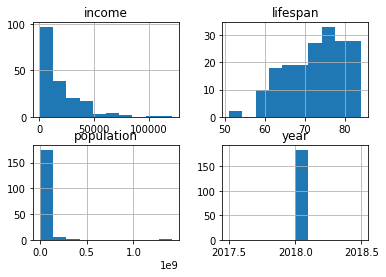

In [38]:
present.hist()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

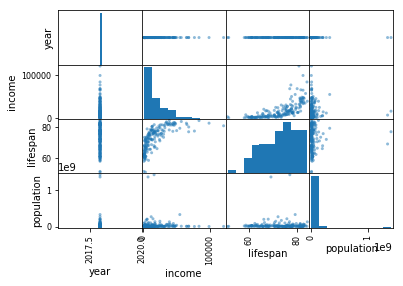

In [39]:
pd.plotting.scatter_matrix(present);

## Plot multiple years

In [43]:
import seaborn as sns
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specific options.

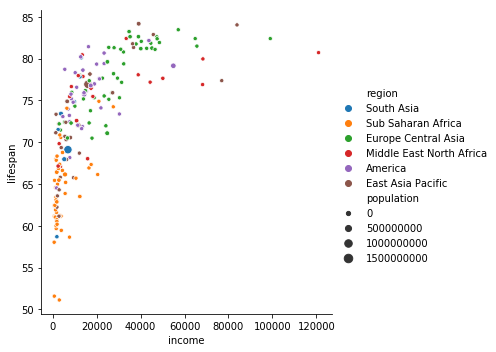

In [44]:
sns.relplot(x= 'income', y='lifespan', hue='region', size='population', data=present)

In [45]:
present['log_income'] = np.log(present['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


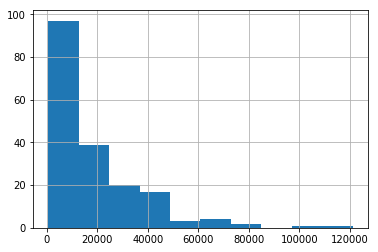

In [46]:
present.income.hist()

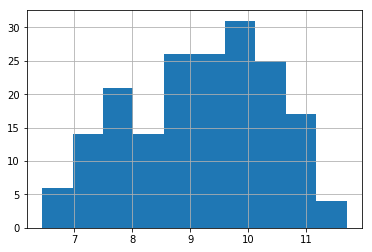

In [50]:
present.log_income.hist()

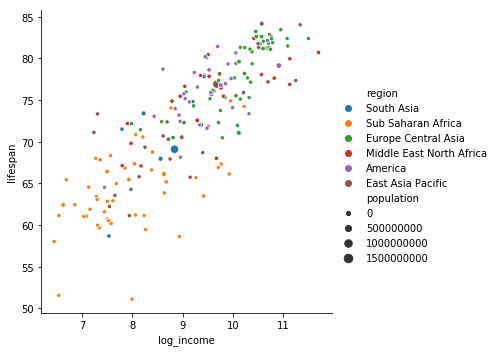

In [51]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data= present)

In [53]:
present[present['log_income'] >= 11].sort_values(by='log_income')

,year,income,lifespan,population,name,region,log_income
27296,2018,64846,82.39,5353363,Norway,Europe Central Asia,11.079771
16956,2018,65622,81.49,4803748,Ireland,Europe Central Asia,11.091666
922,2018,68231,76.89,9541615,United Arab Emirates,Middle East North Africa,11.130654
20241,2018,68359,79.96,4197128,Kuwait,Middle East North Africa,11.132529
5521,2018,76943,77.36,434076,Brunei,East Asia Pacific,11.250820
31895,2018,83888,84.03,5791901,Singapore,East Asia Pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,Europe Central Asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,Middle East North Africa,11.703819


In [55]:
qatar = present[present['name'] == 'Qatar']
# qatar_income = qatar['log_income'].values[0]
qatar_income = qatar['log_income'].iloc[0]
qatar_lifespan= qatar['lifespan'].iloc[0]
print(qatar_income, qatar_lifespan)

11.703818514668283 80.71


Text(0.5, 1.0, 'Qatar has the highest GDP per capita in 2018')

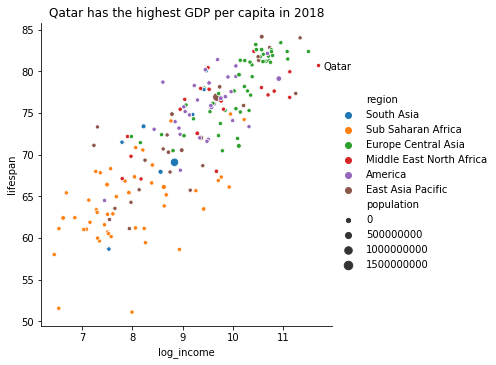

In [57]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', data=present)
plt.text(x=qatar_income+.1, y=qatar_lifespan-.5, s='Qatar')
plt.title("Qatar has the highest GDP per capita in 2018")

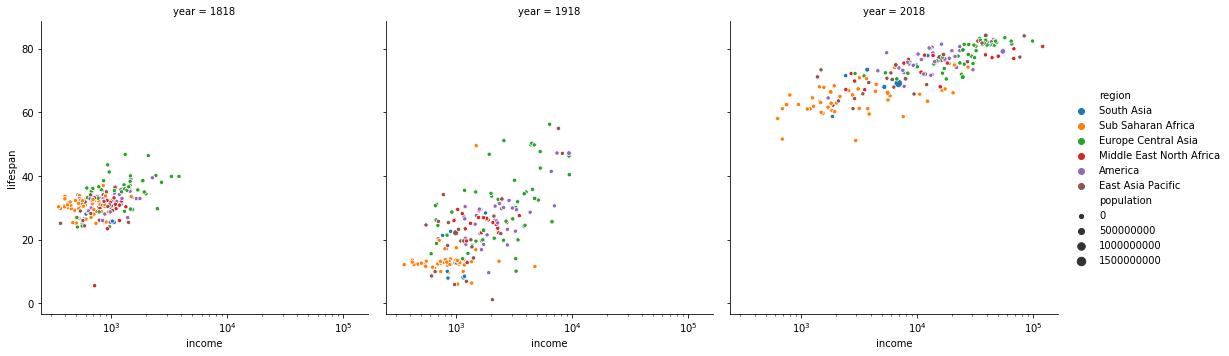

In [61]:
df['log_income'] = np.log(df['income'])

years = [1818, 1918, 2018]

centuries = df[df['year'].isin(years)]

sns.relplot(x= 'income', y='lifespan', hue='region', size= 'population', 
           col= 'year', data=centuries);
plt.xscale('log');

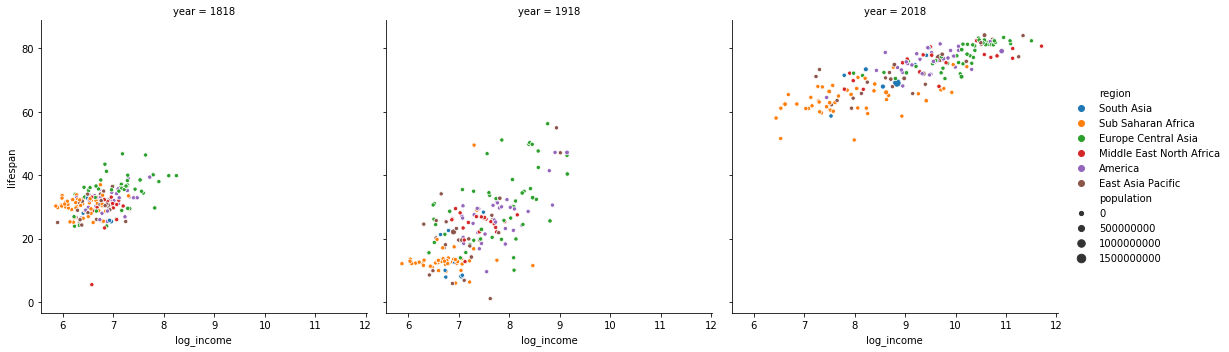

In [62]:
years = [1818, 1918, 2018]

centuries = df[df['year'].isin(years)]

sns.relplot(x='log_income', y = 'lifespan', hue='region', size='population', 
           col='year', data = centuries);

## Point out a story

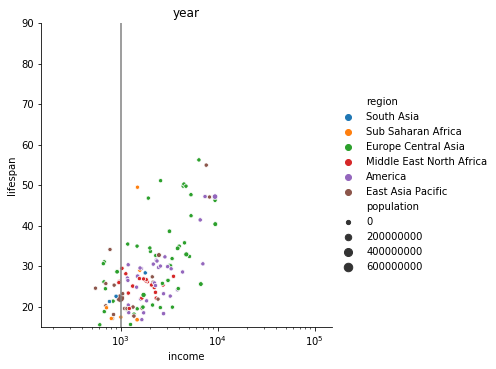

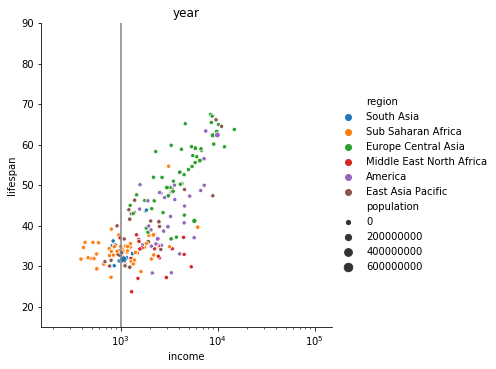

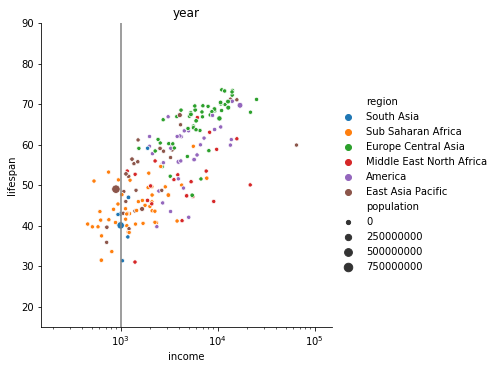

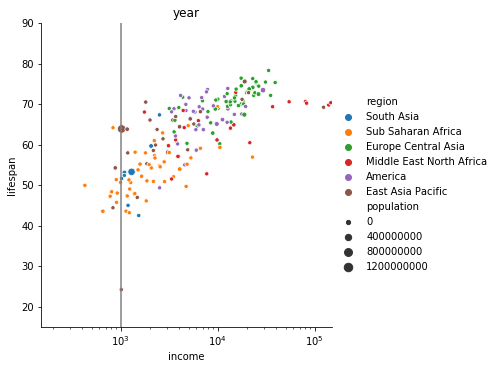

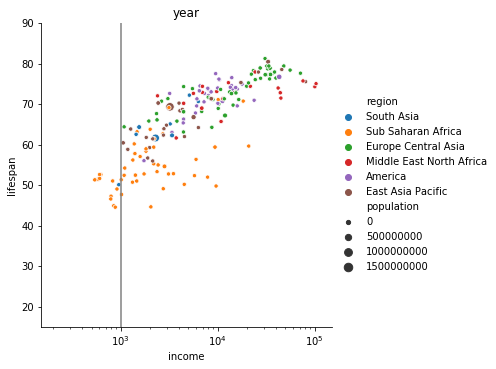

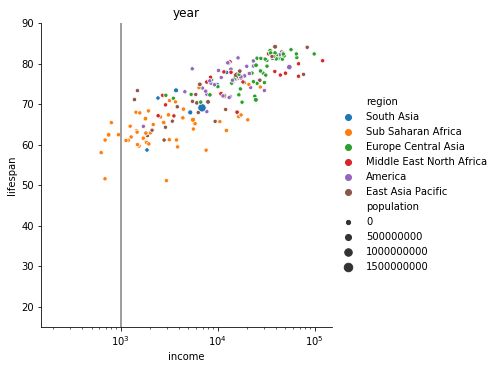

In [63]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
             data=df[df['year'] == year])
  plt.xscale('log')
  plt.title('year')
  plt.xlim(150, 150000)
  plt.ylim(15,90)
  # plt.axhline(y=50, color='grey')
  plt.axvline(x=1000, color= 'grey')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project